##**Thông tin**


1.   Họ tên: Trần Huỳnh Kỳ Anh
2.   MSSV: 19521216
3.   Ngày thực hiện: 30/11/2021
4.   Nội dung: 



In [3]:
!git clone https://github.com/tranhuynhkyanh/CS116 

Cloning into 'CS116'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 86 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [4]:
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [5]:

dir_cho = "/content/CS116/data_/cho"
dir_meo = "/content/CS116/data_/meo"
dir_nguoi = "/content/CS116/data_/nguoi"
dir_xe = "/content/CS116/data_/xe"
dir_cay= "/content/CS116/data_/cay"

#Load pretrain model

In [6]:
model = VGG16()
print(model.summary())

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

#Load các ảnh trong 1 thư mục

In [7]:
import os
dir_img_list = []
dir_list_cho = os.listdir(dir_cho)
dir_list_meo = os.listdir(dir_meo)
dir_list_cay = os.listdir(dir_cay)
dir_list_nguoi = os.listdir(dir_nguoi)
dir_list_xe = os.listdir(dir_xe)

In [8]:
def list_full_path(dir_path,list_name,name):
  rslt = []
  rslt_name = []
  for i in list_name:
    dir_full = os.path.join(dir_path,i)
    rslt.append(dir_full)
    rslt_name.append(name)
  return rslt,rslt_name

In [9]:
cho,name_ch = list_full_path(dir_cho,dir_list_cho,"cho")
nguoi,name_ng = list_full_path(dir_nguoi,dir_list_nguoi,"nguoi")
cay,name_ca = list_full_path(dir_cay,dir_list_cay,"cay")
meo,name_me = list_full_path(dir_meo,dir_list_meo,"meo")
xe,name_xe = list_full_path(dir_xe,dir_list_xe,"xe")

In [10]:
dir_img_list = cho + nguoi + cay + meo + xe
dir_name_list = name_ch + name_ng + name_ca + name_me + name_xe

In [11]:
dir_img_list

['/content/CS116/data_/cho/0(10).jpg',
 '/content/CS116/data_/cho/0(8).jpg',
 '/content/CS116/data_/cho/0(2).jpg',
 '/content/CS116/data_/cho/0(9).jpg',
 '/content/CS116/data_/cho/0(4).jpg',
 '/content/CS116/data_/cho/0(7).jpg',
 '/content/CS116/data_/cho/0(1).jpg',
 '/content/CS116/data_/cho/0(6).jpg',
 '/content/CS116/data_/cho/0(5).jpg',
 '/content/CS116/data_/cho/0(3).jpg',
 '/content/CS116/data_/nguoi/0(10).jpg',
 '/content/CS116/data_/nguoi/0(8).jpg',
 '/content/CS116/data_/nguoi/0(2).jpg',
 '/content/CS116/data_/nguoi/0(9).jpg',
 '/content/CS116/data_/nguoi/0(4).jpg',
 '/content/CS116/data_/nguoi/0(7).jpg',
 '/content/CS116/data_/nguoi/0(1).jpg',
 '/content/CS116/data_/nguoi/0(6).jpg',
 '/content/CS116/data_/nguoi/0(5).jpg',
 '/content/CS116/data_/nguoi/0(3).jpg',
 '/content/CS116/data_/cay/0(10).jpg',
 '/content/CS116/data_/cay/0(8).jpg',
 '/content/CS116/data_/cay/0(2).jpg',
 '/content/CS116/data_/cay/0(9).jpg',
 '/content/CS116/data_/cay/0(4).jpg',
 '/content/CS116/data_/cay/

#Rút trích đặc trưng các ảnh

In [12]:

vgg16_feature_list = []
for i, fname in enumerate(dir_img_list):
    img = image.load_img(fname, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature_list.append(img_data)

In [13]:
vgg16_feature_list = np.array(vgg16_feature_list)
vgg16_feature_list=  vgg16_feature_list.reshape(50,224*224*3)
vgg16_feature_list.shape

(50, 150528)

#Đọc ảnh truy vấn và rút trích đặc trưng

In [14]:
def read_feature(path):
  img_que = image.load_img(path, target_size=(224, 224))
  img_data_que = image.img_to_array(img)
  img_data_que = np.expand_dims(img_data_que, axis=0)
  img_data_que = preprocess_input(img_data_que)
  img_data_que = img_data_que.reshape(1,224*224*3)
  #print(img_data_que.shape)
  return img_data_que

#KNN để tìm đặc trưng gần nhất

In [15]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(vgg16_feature_list)

NearestNeighbors(n_neighbors=3)

In [16]:
def findKNN(path):
  img_data_q = read_feature(path)
  indicies = knn.kneighbors(img_data_q, return_distance=False)
  return indicies

#Show 3 ảnh gần nhất

In [17]:
import cv2
from google.colab.patches import cv2_imshow

In [18]:
path = "nguoi.jpg"

In [20]:
index = findKNN(path)

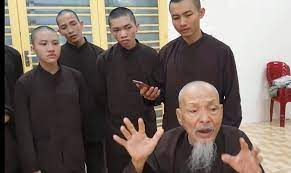

In [21]:
cv2_imshow(cv2.imread(path))

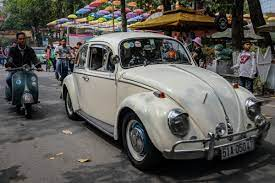

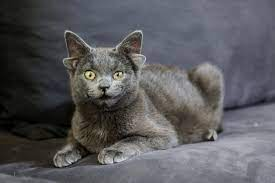

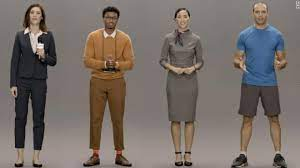

In [22]:
for i in index[0]:
  img = cv2.imread(dir_img_list[i], cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)